## 2.3.1 예제에 사용할 데이터셋

In [40]:
# 두개의 특성을 가진 forge 데이터셋 이요
#x측: 첫번째 특성, y 축: 두번째 특성

X.shape: (26, 2)


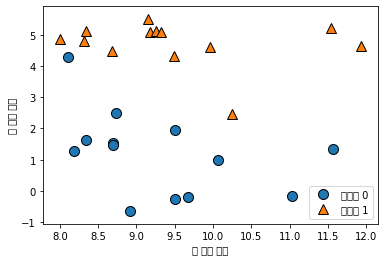

In [41]:
#데이터셋을 만듭니다.
import matplotlib.pyplot as plt
import mglearn.datasets
import warnings
warnings.filterwarnings('ignore')

X,y=mglearn.datasets.make_forge()

#산점도를 만듭니다.
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

In [42]:
## wave 데이터셋 사용 -입력 특성 하나, 모델링할 타깃변수를 가진다.
## x축-특성, y축-회귀의 타깃

Text(0, 0.5, '타깃')

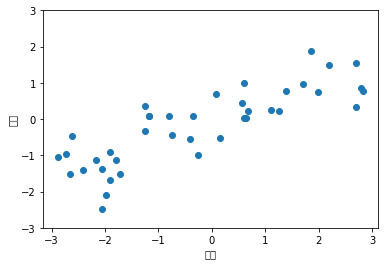

In [43]:
X,y= mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [44]:
## 위스콘신 유방암 데이터셋-각 종양은 양성과 악성으로 레이블되어 있고, 조직 데이터를 기반으로 종양이 악성인지를 예측할 수 있도록 학습하는 것

In [45]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [46]:
print("유방암 데이터의 형태:", cancer.data.shape)
# 악성이 212개, 양성이 357개

유방암 데이터의 형태: (569, 30)


In [47]:
import numpy as np
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [48]:
print("특성 이름: \n", cancer.feature_names)

특성 이름: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [49]:
## 보스턴 주택가격 데이터셋 이용
## 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주택 평균 가격을 예측하는 것
## 데이터 포인트 506개, 특성 13개

In [50]:
from sklearn.datasets import load_boston
boston=load_boston()
print("데이터 형태: ", boston.data.shape)

데이터 형태:  (506, 13)


In [51]:
#특성공학: 특성을 유도해내는 것

In [52]:
X,y=mglearn.datasets.load_extended_boston() #유도된 데이터셋
print("X.shape: ",X.shape)
#13개의 원래 특성에 13개에서 2개씩 짝지은 91개의 특성을 더해 총 104개가 된다.

X.shape:  (506, 104)


## 2.3.2 k-최근접 이웃

In [53]:
## k-NN(k-Nearest Neighbors): 가장 간단한 머신러닝 알고리즘
## 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾는다.

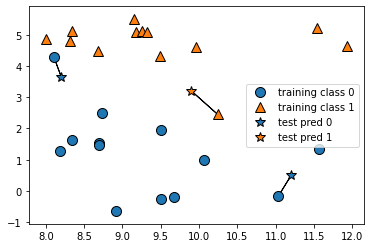

In [54]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

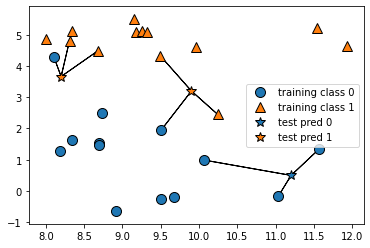

In [55]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [56]:
## scikit-learn을 사용해서 k-최근접 이웃 알고리즘 적용
## 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눈다.
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()


X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=0)

In [57]:
#이웃의 수를 3으로 지정
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

In [58]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [60]:
#모델이 얼마나 잘 일반화 되었는지 평가
print("테스트 세트 정확도:{:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도:0.86


### KNEighborsClassifiesr 분석

In [61]:
# 결정 경계: 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 것

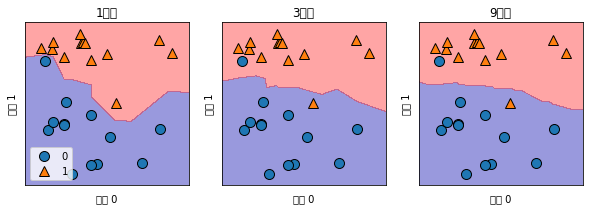

In [62]:
fig, axes=plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    #fit 메소드는 self 오브젝트를 리턴합니다.
    #그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X,fill=True,eps=0.5,ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=ax)
    ax.set_title("{}이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

##이웃의 수를 늘릴 수록 결정경계가 부드러워진다.=더 단순한 모델
##이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아진다.

In [63]:
# 모델의 복잡도와 일반화 사이의 관계 입증-유방암 데이터셋 사용

In [64]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]
#1에서 10까지 n_neighbors를 적용
neighbors_settings=range(1,11)

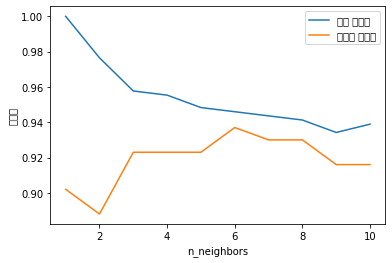

In [65]:
for n_neighbors in neighbors_settings:
    # 모델생성
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train,y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings,training_accuracy,label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy,label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

### k-최근접 이웃 회귀

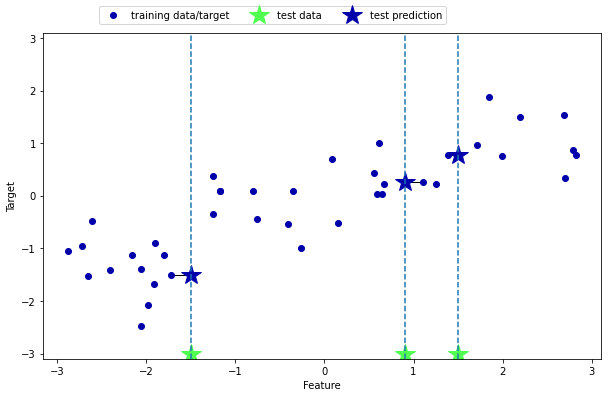

In [66]:
#wave 데이터셋 이용
mglearn.plots.plot_knn_regression(n_neighbors=1)

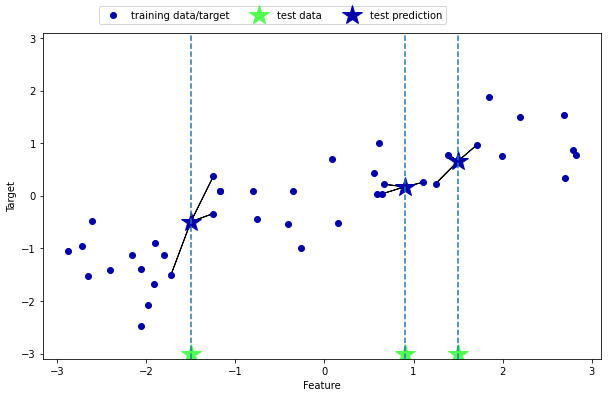

In [67]:
# 이웃을 둘 이상 사용하여 회귀 분석을 할 수 있다.
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [68]:
# scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 KNeighborsRegressor에 구현되어 있다.
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)

In [69]:
# wave 데이터셋을 훈련세트와 테스트 세트로 나눠준다.
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg=KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [70]:
# 데스트 세트에 대한 예측
print("테스트 세트 예측: \n", reg.predict(X_test))

테스트 세트 예측: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [71]:
print("데이터 세트 R^2: {:.2f}".format(reg.score(X_test,y_test)))

데이터 세트 R^2: 0.83


### KNeighborsRegressor 분석

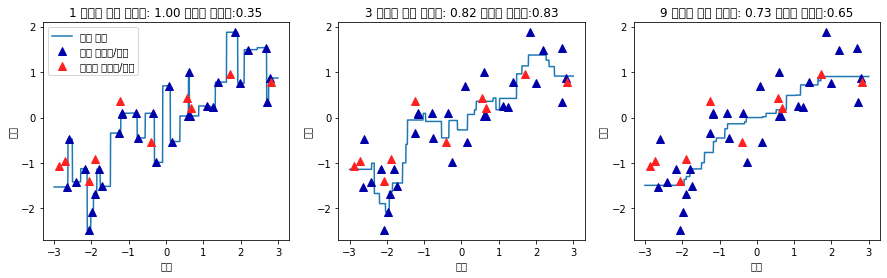

In [72]:
fig, axes=plt.subplots(1,3,figsize=(15,4))
#-3과 3 사이에 1000개의 데이터 포인트를 만든다.
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    # 1,3,9 이웃을 사용한 예측을 합니다.
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,y_test,'^',c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어:{:.2f}".format(
            n_neighbors, reg.score(X_train,y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃",
                "데이터 테이터/타깃"], loc="best")

## 2.3.3 선형 모델

w[0]: 0.393906  b: -0.031804


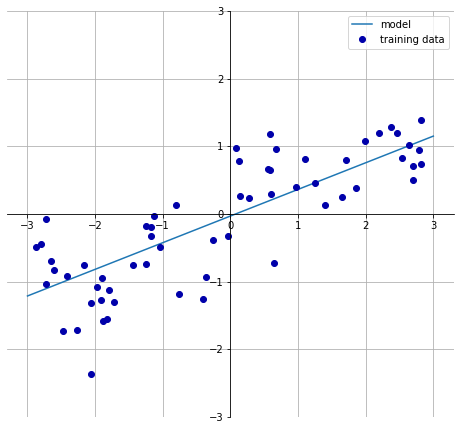

In [73]:
mglearn.plots.plot_linear_regression_wave()

In [74]:
from sklearn.linear_model import LinearRegression
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test, y_train,y_test=train_test_split(X,y,random_state=42)

lr=LinearRegression().fit(X_train,y_train)

In [75]:
# 기울기 파라미터는 가중치 또는 계수라고 하며  lr 객체의 coef_속성에 저장되어 있고 편향 또는 절편 파라미터는 intercept 속성에 저장되어 있습니다.

In [76]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [78]:
print("훈련 세트 점수:{:2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test, y_test)))

## R^2값이 0.66 인 것이 좋은 결과는 아님.
## 하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷함
## 과소적합인 상태를 의미
## 1차원 데이터셋에서는 모델이 매우 단순하므로 과대적합을 걱정할 필요가 없음.
## 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높음

훈련 세트 점수:0.670089
테스트 세트 점수:0.66


In [81]:
X,y =mglearn.datasets.load_extended_boston()

X_train, X_test,y_train, y_test=train_test_split(X,y, random_state=0)
lr=LinearRegression().fit(X_train, y_train)

In [82]:
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test,y_test)))

## 모델이 과대적합됨.

훈련 세트 점수:0.95
테스트 세트 점수:0.61
